# Welcome

![](https://github.com/favstats/WarwickSpringCamp_QTA/blob/main/slides/day1/images/titleslide.png?raw=true)

**Welcome to the Quantitative Text Analysis in R Workshop!**

Link to Slides (Day 1): https://favstats.github.io/WarwickSpringCamp_QTA/slides/day1

**Workshop description:**

We live in a digital society, and enormous amounts of textual data are generated every day. Text analysis for social science research is not new, but with recent computational advances, we can now process text much more efficiently and in greater quantity. 

Quantitative text analysis is a set of tools that help make sense of textual data by systematically extracting information from texts. This workshop will teach you the fundamentals of quantitative text analysis and provide you with hands-on experience with cutting-edge methods implemented in R. 

The workshop covers important basics (e.g., pre-processing, tokenization, and part-of-speech tagging) as well as three types of analytic techniques: rule-based, unsupervised, and supervised methods (dictionary methods, topic models and machine learning, respectively). 

By the end of this workshop, participants will have a good understanding of the potentials and limitations of quantitative text analysis, as well as some experience working with the R software packages for conducting this type of analysis.




For the purposes of this workshop we are going to use **Google Colab**.



## Google Colab

Google Colab is a free coding environment (*a Jupyter notebook*) that runs entirely in the cloud. 

Think: Google Docs but for *code*.

$\color{blue}{\text{Upsides}}$ of using Google Colab

+ No need to set up R and RStudio on your own computer. 
+ We can dive in right in now


$\color{red}{\text{Downsides}}$

+ You will have to set up R and RStudio on your own computer (when you want to use R on your own)




<br>

**For future reference (you won't need this for the workshop)**


+ Download R from here: https://cran.r-project.org/
+ Download RStudio from here: https://www.rstudio.com/products/rstudio/download/



In [ ]:
# To this if you want to install all the needed packages
# NOTE: this may take 2 minutes or more 
# if (!require("pacman")) install.packages("pacman")
# pacman::p_load(palmerpenguins, tidytext, sentimentr)

## `tidyverse` functions reference list

For reference, here is a list of some useful  functions.

If you have trouble with any of these functions, try reading the documentation with `?function_name` or ask me :)

You can also consult these slides: https://favstats.github.io/ds3_r_intro/#153

Remember: tidyverse-style functions typically take the **data** first.

* `filter()`

  * Subset rows using column values

* `mutate()`

  * Create and modify delete columns

* `rename()`

  * Rename columns

* `select()`

  * Subset columns using their names and types

* `summarise()`; `summarize()`

  * Summarise each group to fewer rows

* `group_by()`; `ungroup()`

  * Group by one or more variables

* `arrange()`

  * Arrange rows by column values

* `count()`; `tally()` 

  * Count observations by group

* `distinct()`

  * Subset distinct/unique rows

* `pull()`

  * Extract a single column

* `ifelse()`

  * useful for coding of binary variables

* `case_when()`

  * useful for recoding (when `ifelse` is not enough)

* `separate()`

  * separate two variables by some separator

* `pivot_wider()`

  * turn data into wide format

* `pivot_longer()`

  * turn data into long format


# *Strings* in R

## Basics

In this chapter we will talk about strings and how to manipulate them.

Below you can see a simple string:

In [ ]:
"Hello I am a string! In R I am known by the class of 'character'"


[1] "Hello I am a string! In R I am known by the class of 'character'"

You can also have multiple texts in one vector by concatenating with `c()`

In [ ]:
c("Hello I am a string!",  "In R I am known by the class of 'character'")


[1] "Hello I am a string!"                       
[2] "In R I am known by the class of 'character'"

And of course we may also assign this vector to an object using `<-`


In [ ]:
chr_vector <- c("Hello I am a string!",  "In R I am known by the class of 'character'")
chr_vector

[1] "Hello I am a string!"                       
[2] "In R I am known by the class of 'character'"

## String theory with the help of `stringr`

<p style="font-size:1px"></p> | <p style="font-size:1px"></p>
-------------------|------------------
 <img src="https://stringr.tidyverse.org/logo.png" width = "150"> | <p style="font-size:10px">"The `stringr` package provide a cohesive set of<br>functions designed to make working with strings<br>as easy as possible."</p>





It has functions for 

  + **detecting patterns in strings:** `str_detect()`
  
  + **replacing/removing parts:** `str_replace()` or `str_remove()`
  
  + **trimming whitespace:** `str_trim()` or `str_squish()`
  
and much more!

Here are some of its functions:

| functions    | what it does                             |
|--------------|------------------------------------------|
| `str_count` | count how often a pattern occurs             |
| `str_extract`  | extract a pattern from a string           |
| `str_length`   | count how many characters does a string have        |
| `str_starts`, `str_ends` | tests if string starts/ends with certain pattern         |
| `str_to_lower`, `str_to_upper` | to lower/upper case |

In [ ]:
## normally we would have to install stringr but Google Colab already has it pre-installed
# install.packages("stringr")
library(stringr)

### **Detecting** patterns

Detect a pattern with `str_detect()`

With `str_detect()` you can conduct a *logical test* to test if a certain pattern occurs in your string. It returns `TRUE` or `FALSE`.



---



The following line on code below asks:

Does `"I am part of the string!"` occur within the string `"Hello I am a string"`?






In [ ]:
str_detect(string = "Hello I am a string", pattern = "I am part of the string!")

[1] FALSE

This returns `FALSE`, as one would expect! `"I am part of the string!"` **does not** occur within `"Hello I am a string"`.

---

In [ ]:
str_detect(string = "Hello I am a string", pattern = "Hello")

[1] TRUE

`"Hello"` does occur in `"Hello I am a string"`

---



In [ ]:
str_detect(string = "Hello I am a string", pattern = "hello")

[1] FALSE

**Note:** the patterns are **case-sensitive**, so matching lower-case `"hello"` will evaluate to `FALSE`

---

Using `str_detect()` can be very useful when we deal with strings within data frames and want to filter it down. Here an example:

First, let's load some packages:

In [ ]:
if(!require("palmerpenguins")){
    install.packages("palmerpenguins")
}

library(palmerpenguins)
library(dplyr)

Loading required package: palmerpenguins


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
palmerpenguins::penguins_raw %>% 
  head(5)

## matching by direct name
# palmerpenguins::penguins_raw %>% 
#  filter(Species == "Gentoo penguin (Pygoscelis papua)") %>%
#  head(5)

## matching with `str_detect()`
# palmerpenguins::penguins_raw %>% 
#  filter(str_detect(Species, "Gentoo penguin")) %>%
#  head(5) 

studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181,3750,MALE,NA,NA,Not enough blood for isotopes.
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NA
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,NA
PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NA,NA,NA,NA,NA,NA,NA,Adult not sampled.
PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NA



### **Extracting** patterns

In [ ]:
str_extract(string = "Hello I am a string", pattern = "a")

[1] "a"

In [ ]:
str_extract_all(string = "Hello I am a string", pattern = "a")

[[1]]
[1] "a" "a"

### **Replacing** patterns

In [ ]:
str_replace(string = "Hello I am a string", pattern = "am", replacement = "REPLACED")

[1] "Hello I REPLACED a string"

In [ ]:
str_replace_all(string = "Hello I am a string", pattern = " ", "---")

[1] "Hello---I---am---a---string"

### **Removing** patterns

In [ ]:
str_remove(string = "Hello I am a string", pattern = "Hello ")

[1] "I am a string"

In [ ]:
str_remove_all(string = "Hello I am a string", pattern = " ")

[1] "HelloIamastring"

In [ ]:
str_trim(string = "        Hello I am a string with lots of whitespace around      ")

[1] "Hello I am a string with lots of whitespace around"

In [ ]:
str_squish(string = "Hello    I am a     string with lots of whitespace inbetween")

[1] "Hello I am a string with lots of whitespace inbetween"

## $\color{green}{\text{Reg}}$ular $\color{green}{\text{Ex}}$pressions ($\color{green}{\text{Regex}}$)

`([_a-z0-9-]+(\\.[_a-z0-9-]+)*@[a-z0-9-]+(\\.[a-z0-9-]+)*(\\.[a-z]{2,4}))`


> A regular expression (regex) is a special sequence of characters that describes a search pattern. 

Regular expressions can be used to perform all sorts of text manipulations, such as search-and-replace, extractions, and so on. 

If you're not familiar with regular expressions, they can seem like a daunting concept. However, they're actually quite simple once you get the hang of them. With a little practice, you'll be able to use regular expressions to solve a wide variety of problems.

**The regex cited at the beginning of this text section can be used to extract E-Mail addresses from text.**

In [ ]:
some_text <- c("Hi, how are you doing? This is my email: awesomemail@awesomewebsite.co.uk",
               "I have no E-mail but please have my number: +4918434342323")

str_extract(some_text, "([_a-z0-9-]+(\\.[_a-z0-9-]+)*@[a-z0-9-]+(\\.[a-z0-9-]+)*(\\.[a-z]{2,4}))")

[1] "awesomemail@awesomewebsite.co.uk" NA

Here is a non-exhaustive list of special regex characters that work specifically in R:

| symbols     | what it matches                                                                                             |
|-------------|-------------------------------------------------------------------------------------------------------------|
| `⁠[:lower:]⁠` | Lower-case letters in the current locale.                                                                   
| `⁠[:upper:]⁠` | Upper-case letters in the current locale.                                                                   |
| `⁠[:digit:]⁠` | Digits: `0 1 2 3 4 5 6 7 8 9⁠`.                                                                              |
| `⁠[:alpha:]⁠` | Alphabetic characters: `[:lower:]` and `⁠[:upper:]⁠`.                                                         |
| `⁠[:alnum:]⁠` | Alphanumeric characters: `⁠[:alpha:]` and `⁠[:digit:]⁠`.                                                       |
| `[:blank:]⁠` | Blank characters: space and tab, and possibly other locale-dependent characters such as non-breaking space. |
| `⁠[:punct:]⁠` | `⁠! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ { \| } ~⁠`.                                           |

If you'd like to see more special regex characters: [click here](https://stat.ethz.ch/R-manual/R-devel/library/base/html/regex.html).


In [ ]:
some_text <- "Here are some numbers: 232323."

str_remove_all(some_text, "[:punct:]")

[1] "Here are some numbers 232323"

Here are some more general regex special characters that typically work in most programming languages:

| symbols | what it matches                                                            |
|---------|----------------------------------------------------------------------------|
| `.⁠` |Placeholder character to match anything. |
| `⁠*`     | The preceding item will be matched **zero or more times**.                     |
| `⁠+⁠`     | The preceding item will be matched **one or more times**.                      |
| `{n}⁠`   | The preceding item is matched **exactly n times**.                             |
| `⁠{n,}⁠`  | The preceding item is matched **n or more times**.                             |
| `⁠{n,m}⁠` | The preceding item is matched **at least n times, but not more than m times**. |


Regular expressions can be created in a number of ways, such as by using special characters, or by defining a set of characters that you wish to match. For example, the character `"."` (period) is used to match any character, so the regular expression `".at"` would match `"cat"`, `"bat"`, and `"hat"`.

In [ ]:
some_text <- c("Francis Fukuyama", "francis fukuyama", "franis fukuyama", "franiss fukuyama")

str_extract(some_text, "Francis Fukuyama")

[1] "Francis Fukuyama" "francis fukuyama" "franis fukuyama"  "franiss fukuyama"

### Small Regexercise(s)

Find the appropriate regex to extract each (mis)spellings of Nicolas Cage's name

![](https://github.com/favstats/WarwickSpringCamp_QTA/blob/main/docs/slides/day1/images/nicolas.png?raw=true)

In [ ]:
cage_text <- c("Nicolas Cage", "Nicolas Rage", "Nick Cage", "Nicolás Cagé", "Saint-Nicolas Cage")

str_extract(cage_text, "Nicolas Cage")


[1] "Nicolas Cage"       "Nicolas Rage"       "Nick Cage"         
[4] "Nicolás Cagé"       "Saint-Nicolas Cage"

Find the appropriate regex to extract each (mis)spellings of Mark Wahlberg's name



![](https://github.com/favstats/WarwickSpringCamp_QTA/blob/main/docs/slides/day1/images/markimoo.png?raw=true)

In [ ]:
some_more_text <- c("Mark Wahlberg", "Marc waalberg", "Mahrk Vahlbehrk", "Mark Wahlbergensis", "Mark the Man")

str_extract(some_more_text, "Mark Wahlberg")


[1] "Mark Wahlberg"      "Marc waalberg"      "Mahrk Vahlbehrk"   
[4] "Mark Wahlbergensis" "Mark the Man"

Some more resources to learn about regex:

1. https://stringr.tidyverse.org/articles/regular-expressions.html
2. https://spannbaueradam.shinyapps.io/r_regex_tester/

# Text mining with `tidytext`


<p style="font-size:1px"></p> | <p style="font-size:1px"></p>
-------------------|------------------
 <img src="https://juliasilge.github.io/tidytext/reference/figures/logo.png" width = "150"> | <p style="font-size:10px">"The `tidytext` package provides various functions and<br>support for manipulating text adhering to tidy data principles."</p>







In [ ]:
if(!require("tidytext")){
    install.packages("tidytext")
}

library(tidytext)


## Tokenization

Tokenization is the process of breaking down a string of text into smaller elements called tokens. Tokens can be individual words, phrases, or even complete sentences. Tokenization is often used as a pre-processing step for other NLP tasks such as part-of-speech tagging, and named entity recognition.

One of the most common tokenization methods is *white space tokenization*, where tokens are delimited by whitespace characters such as spaces, tabs, and newlines. Another common method is *punctuation tokenization*, where punctuation marks such as periods, commas, and exclamation points are used to delimit tokens.

Before we talk further about tokenization, let's do a short excourse in tidy data and what that means for a tidy tokenized data frame


### Core principle: tidy data

* Every column is a variable.
* Every row is an observation.
* Every cell is a single value.

An example of tidy data:


In [ ]:
palmerpenguins::penguins %>%
  head(5)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007


<center>
<img src="https://www.openscapes.org/img/blog/tidydata/tidydata_2.jpg" style="width: 80%" />
</center>

Artist: [Allison Horst](https://github.com/allisonhorst)


Tidy data has two decisive advantages:

* Consistently prepared data is easier to read, process, load and save.

* Many procedures (or the associated functions) in R require this type of data.

<center>
<img src="https://www.openscapes.org/img/blog/tidydata/tidydata_4.jpg" style="width: 40%" />
</center>

Artist: [Allison Horst](https://github.com/allisonhorst)


> "We thus define the tidy text format as being a table with **one-token-per-row**. A token is a meaningful unit of text, such as a word, that we are interested in using for analysis, and tokenization is the process of splitting text into tokens." *~Text Mining with R (Julia Silge and David Robinson)*

The **one-token-per-row** can be a single word, but can also an multiple words (n-gram), sentence, or paragraph.

In order to transform text data into tokens (i.e. tokenization) we use the `unnest tokens()` function of the `tidytext` library to do this.

### Trump tweets example

To make these examples more fun we will use some Trump tweets to perform tokenization.

Data is originally from [Kaggle](https://www.kaggle.com/datasets/codebreaker619/donald-trump-tweets-dataset?resource=download)

In [ ]:
## read in Trump tweets
trump_tweets <- readr::read_csv("https://raw.githubusercontent.com/favstats/WarwickSpringCamp_QTA/main/docs/slides/day1/data/trump_tweets.csv")

Rows: 56571 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): text, device
dbl  (4): id, favorites, retweets, date_year
lgl  (3): isRetweet, isDeleted, isFlagged
dttm (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
trump_tweets %>%
  head(2)

id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,date_year
<dbl>,<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dttm>,<lgl>,<dbl>
9.845497e+16,Republicans and Democrats have both created our economic problems.,FALSE,FALSE,TweetDeck,49,255,2011-08-02 18:07:48,FALSE,2011
1.234653e+18,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y",FALSE,FALSE,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,FALSE,2020


In [ ]:
## sample 1 tweet
trump_tweet <- sample_n(trump_tweets, 1)

## nuclear tweet
trump_tweet <- trump_tweets[trump_tweets$id == 1165918301932916736,]

trump_tweet$text

[1] "The story by Axios that President Trump wanted to blow up large hurricanes with nuclear weapons prior to reaching shore is ridiculous. I never said this. Just more FAKE NEWS!"

### `unnest_tokens()`

`unnest_tokens` is the main workhorse of `tidytext` with it we can tokenize as words, sentences and more! 

It has three main arguments:

1. `output`: what should the new tokenized variable be called
2. `input`: what is the text variable that includes the text (already present in the dataset)
3. `token`: what are your tokens gonna be? Can be `"words" (default)`, `"characters"`, `"character_shingles"`, `"ngrams"`, `"skip_ngrams"`, `"sentences"`, `"lines"`, `"paragraphs"`, `"regex"`, `"tweets"` (tokenization by word that preserves usernames, hashtags, and URLS )`

In [ ]:
library(tidytext)

trump_tweet %>%
  unnest_tokens(output = word, input = text, token = "words")

id,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,date_year,word
<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dttm>,<lgl>,<dbl>,<chr>
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,the story by axios that president trump wanted to blow up large hurricanes with nuclear weapons prior to reaching shore is ridiculous.
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,i never said this.
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,just more fake news!


Notice how the tokens were automatically set to lowercase and also stripped of punctuation. That may not always be what we want. We can also keep this info by setting the `to_lower` and `strip_punct`to `FALSE`.

In [ ]:
trump_tweet %>%
  unnest_tokens(output = word, input = text, 
                token = "words", to_lower = FALSE,
                strip_punct = FALSE)

### Ngrams


Ngrams are groups of words that are found together in a text. They can be used to find the most common phrases in a text, or to look for patterns in the way words are used.

In [ ]:
trump_tweet %>%
  unnest_tokens(output = trigrams, input = text, token = "ngrams", n = 3)

id,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,date_year,trigrams
<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dttm>,<lgl>,<dbl>,<chr>
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,the story by
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,story by axios
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,by axios that
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,axios that president
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,that president trump
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,president trump wanted
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,trump wanted to
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,wanted to blow
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,to blow up


## Word Frequencies



<img src="https://c.tenor.com/HTNcED86kS4AAAAM/debate-debate2016.gif"/>


Let's count the words most often used by the former US President:

In [ ]:
trump_words <- trump_tweets %>%
  unnest_tokens(word, text, token = "words")

In [ ]:
trump_words %>% 
  count(word, sort = T) %>%
  slice(1:20)

word,n
<chr>,<int>
the,46030
to,26311
and,21157
a,19293
of,18024
t.co,16669
is,16202
in,15961
for,12845


### Pre-processing: removing stop words

Ok. So there are a lot of words that are not that informative on their own like: `the`, `a`, `you`, etc. These words are commonly referred to as *stopwords*.

Stopwords are words that are commonly used in a language but may have little meaning on their own. For bag-of-words approaches (i.e. looking at individual words without context) they are often removed from text in pre-processing because they can may hide more meaningful words. However, it's a very crude method and you should inspect your list of words *carefully* for your use-case.

In this case, let's simply remove stop words to see if we can find some patterns in what Trump was talking about.

In [ ]:
stop_words %>% count(lexicon)

lexicon,n
<chr>,<int>
onix,404
SMART,571
snowball,174


We do this with `anti_join`. Simply put, `anti_join` removes all the matching words in a variable common to both data frames you provide it with. In this case, the `trump_words` and `stop_words` data frame.

In [ ]:
trump_words %>%
  anti_join(stop_words) %>%
  count(word, sort = T)  %>%
  slice(1:20)

Joining, by = "word"


word,n
<chr>,<int>
t.co,16669
https,12204
realdonaldtrump,10945
rt,10167
trump,6573
amp,5682
president,4699
http,4550
people,3497


Looks like there are still a bunch of words (mostly Twitter artifacts like url fragments, user names) that are not so meaningful. 

We can add more stop words to the existing list of stop words like this:

In [ ]:
additional_stop_words <- data.frame(word = c("t.co", "https", "realdonaldtrump", "rt", "amp", "http"))

enhanced_stop_words <- stop_words %>%
  bind_rows(additional_stop_words)

ERROR: ignored

In [ ]:
The `bind_rows` from `dplyr` just appends the `additional_stop_words` to our original data frame of `additional_stop_words`. 

In [ ]:
trump_words %>%
  anti_join(enhanced_stop_words) %>%
  count(word, sort = T)  %>%
  slice(1:20)

Joining, by = "word"


word,n
<chr>,<int>
trump,6573
president,4699
people,3497
country,2338
america,2258
time,2048
donald,1921
news,1860
democrats,1826


### Can we see some differences in top words by year?

In [ ]:
top10_words_per_year <- trump_words  %>%
  anti_join(enhanced_stop_words) %>%
  count(date_year, word, sort = T) %>%
  arrange(-n) %>%
  filter(date_year %in% 2016:2021)  %>%
  group_by(date_year) %>%
  slice(1:10) %>%
  ungroup()

Joining, by = "word"


In [ ]:
top10_words_per_year

date_year,word,n
<dbl>,<chr>,<int>
2016,hillary,461
2016,trump,441
2016,america,292
2016,clinton,286
2016,people,285
2016,trump2016,281
2016,makeamericagreatagain,268
2016,crooked,232
2016,cruz,197


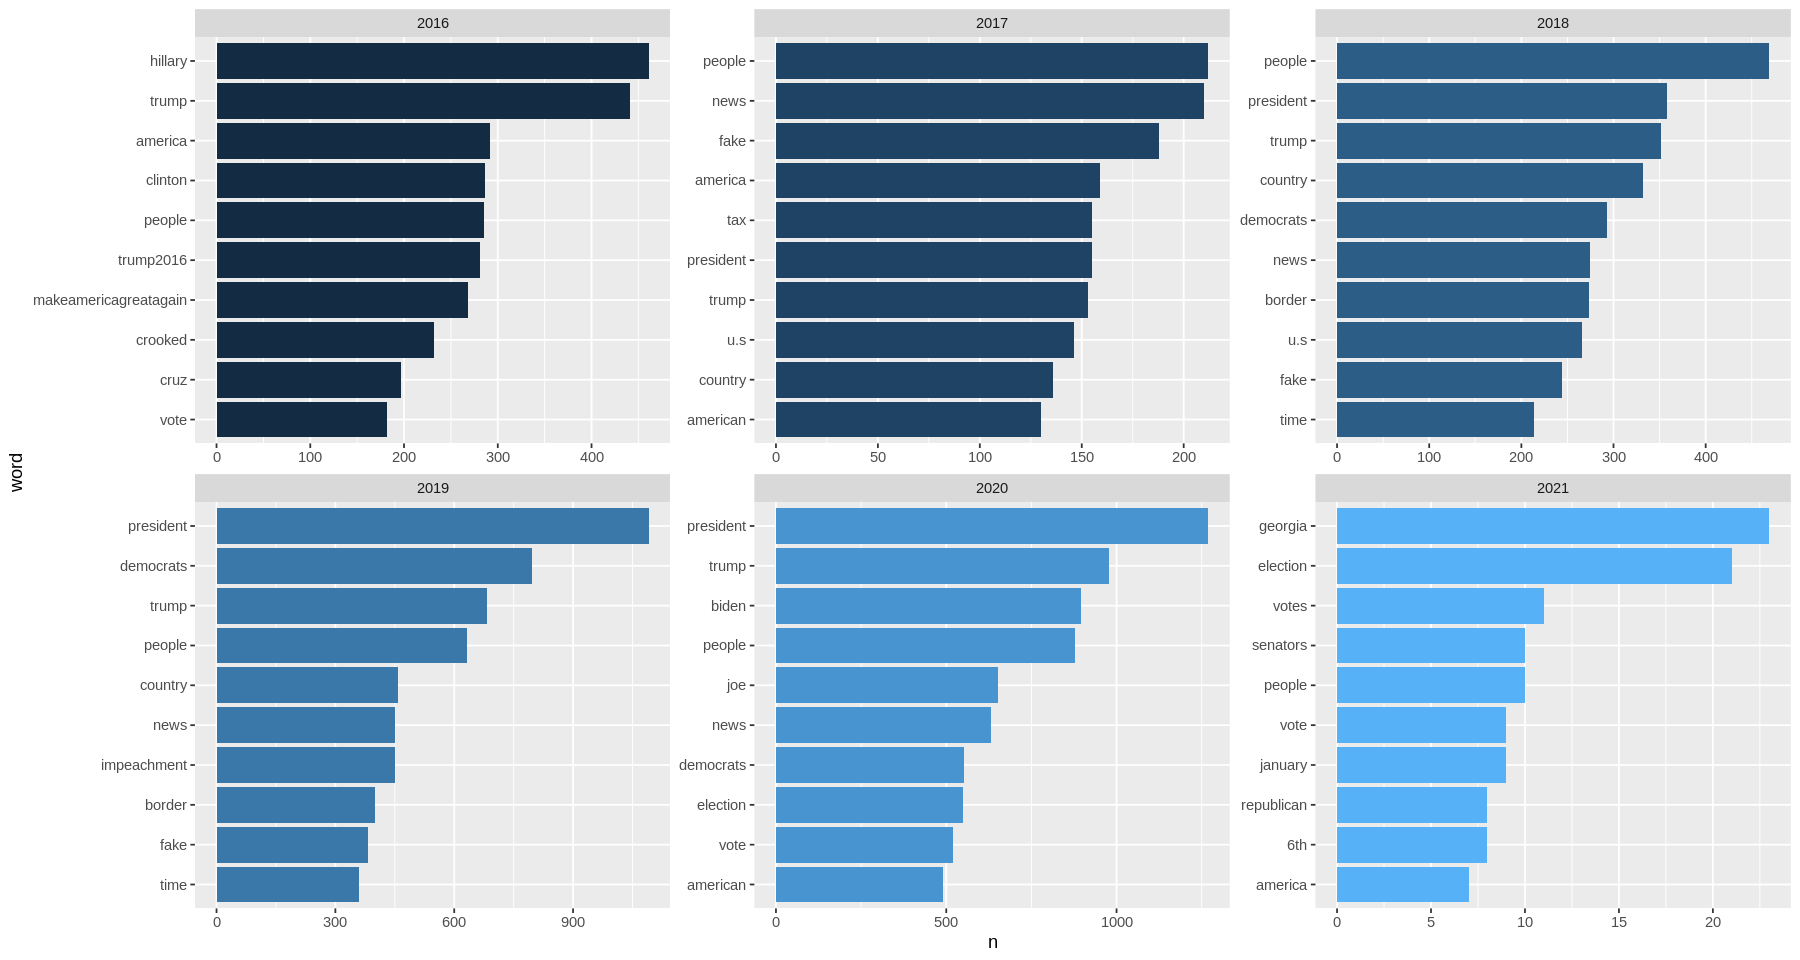

In [ ]:
library(ggplot2)

top10_words_per_year %>% 
  mutate(word = reorder_within(word, n, date_year)) %>%
  ggplot(aes(word, n, fill = date_year)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~date_year, scales = "free") +
  scale_x_reordered() +
  coord_flip()

### A different way to take care of common words: tf-idf


Tf-idf is a technique used for ranking terms based on the frequency of a given term in a range of documents. Tf-idf stands for **t**erm **f**requency-**i**nverse **d**ocument **f**requency. 

The term frequency is the number of times a given term appears in a document. The inverse document frequency is the number of documents that contain the given term divided by the total number of documents. The tf-idf score is the product of the term frequency and inverse document frequency.


Let's calculate tf-idf scores for Trump tweets with the help of `bind_tf_idf`. 

When it comes to Trump tweets, we don't have *obvious* documents. But we can easily consider years as *pseudo*-documents with the fair assumption that different words are important per year.

For easier comparison, we only calculate the scores for when Trump was President (2016-2021).

In [ ]:
trump_tf_idf <- trump_words %>%
  filter(date_year %in% 2016:2021) %>%
  count(date_year, word, sort = T) %>%
  bind_tf_idf(word, date_year, n)

In [ ]:
top10_tfidf_per_year <- trump_tf_idf %>%
  arrange(-tf_idf) %>%
  group_by(date_year) %>%
  slice(1:10) %>%
  ungroup()

In [ ]:
top10_tfidf_per_year

date_year,word,n,tf,idf,tf_idf
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
2016,trump2016,281,0.0036463199,1.0986123,0.0040058919
2016,votetrump,63,0.0008175023,1.7917595,0.0014647676
2016,makeamericagreatagain,268,0.0034776290,0.4054651,0.0014100572
2016,bigleaguetruth,56,0.0007266687,1.7917595,0.0013020156
2016,trump2016https,54,0.0007007163,1.7917595,0.0012555150
2016,rubio,82,0.0010640507,1.0986123,0.0011689791
2016,imwithyou,48,0.0006228589,1.7917595,0.0011160134
2016,marco,42,0.0005450016,1.7917595,0.0009765117
2016,megynkelly,54,0.0007007163,1.0986123,0.0007698155


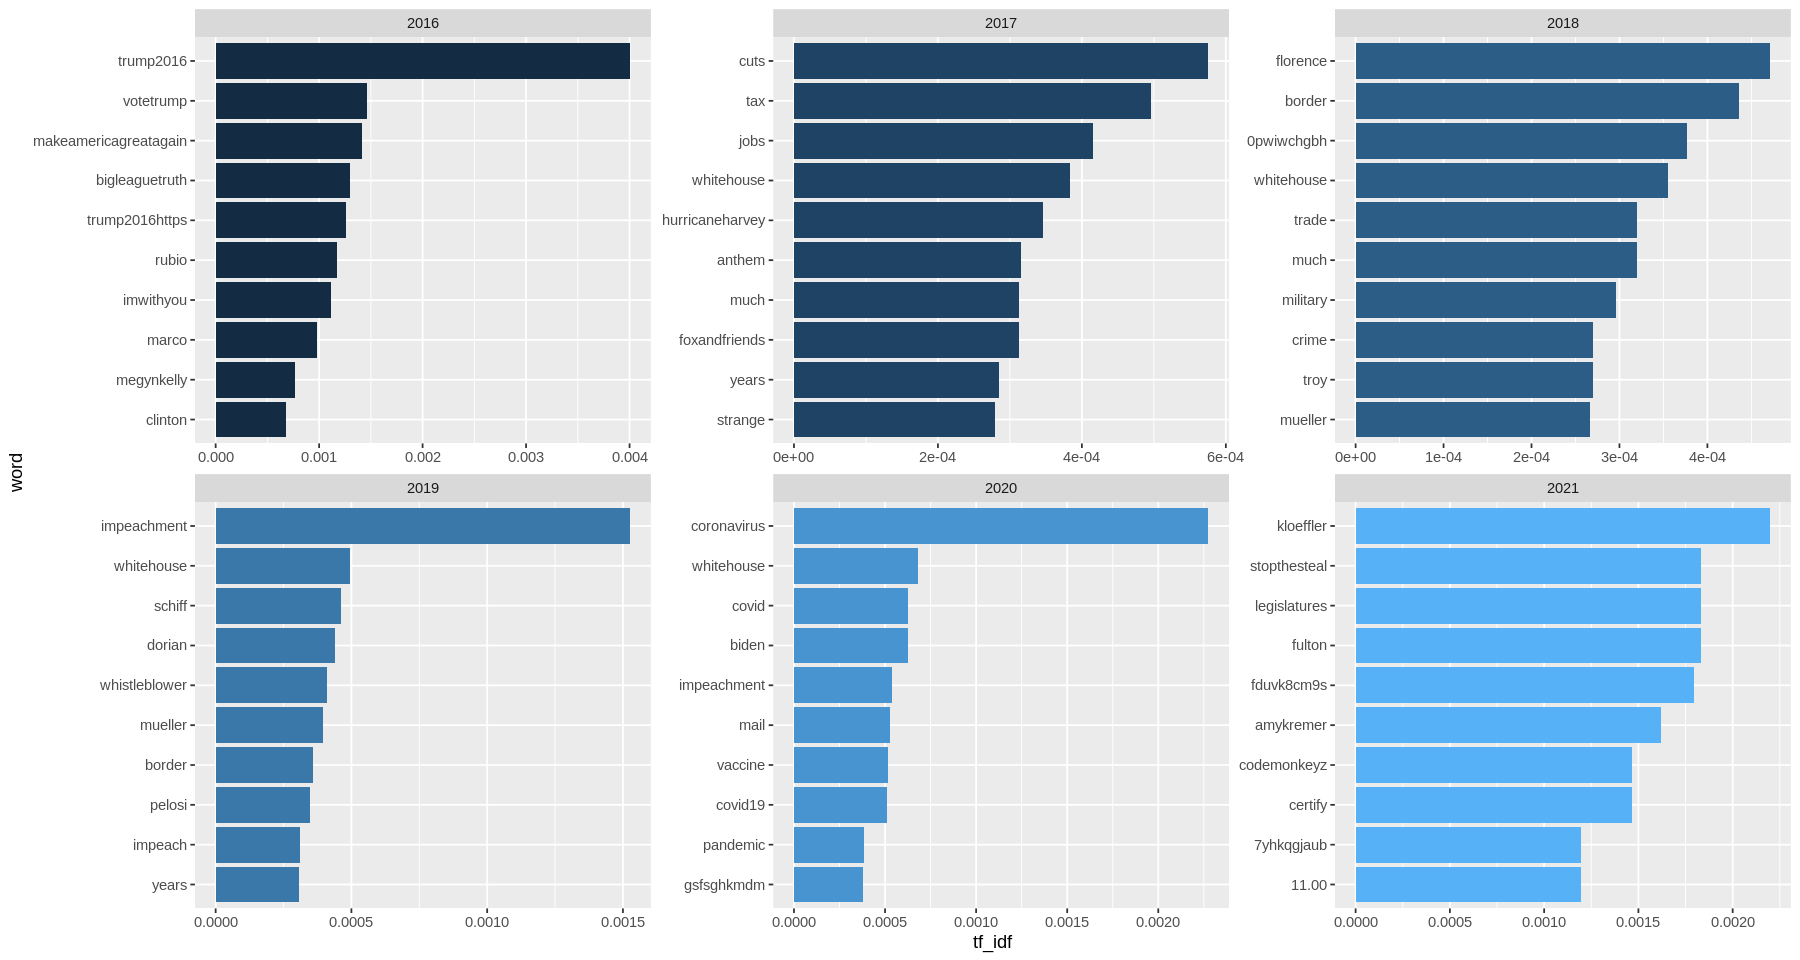

In [ ]:
top10_tfidf_per_year %>% 
  mutate(word = reorder_within(word, tf_idf, date_year)) %>%
  ggplot(aes(word, tf_idf, fill = date_year)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~date_year, scales = "free") +
  scale_x_reordered() +
  coord_flip()

### Pre-processing: Stemming

Stemming and lemmatization are two common techniques used to reduce inflected or derived words to their base forms. 

Inflected words are words that have been modified by a suffix (such as -ed, -ing, -ly, -es, -s) or by a different form of the word (such as the plural form, the third person form). Derived words are words that have been created from another word (such as create and creation).

Stemming usually refers to a crude heuristic process that chops off the ends of words to remove the suffix. This often results in non-words, or words that are not in the dictionary.





In [ ]:
create_words <- c("create", "created", "creation", "creating", "creationism") 

SnowballC::wordStem(create_words)

[1] "creat"    "creat"    "creation" "creat"    "creation"

Lemmatization involves changing a word to its base dictionary form, such as transforming "was" to "be". This requires some knowledge about the words in text (whether it is a noun, verb etc.) and we need more sophisticated methods, like **part-of-speech tagging** to find the lemma of a word. 


# Dictionary methods


Dictionary methods involve looking up words in a pre-defined dictionary and then tagging them according to the concept of interest. 

The most typical implementation of a dictionary method is **sentiment analysis**. In this case, words in a sentence are tagged according to their positive or negative sentiments. 

However, other implementations of dictionary methods exist, for example [moral foundations](https://osf.io/ezn37/).

In this workshop we will mostly be looking at sentiment analysis.

<br>

---

<br>

We are going to use so-called *off-the-shelf* dictionaries, i.e. dictionaries that are already read-made by other researchers. While they are easy to use and, free-of-cost, they may perform poorly for your use-case. 

Before you apply these *off-the-shelf* dictionaries, consider the steps outline below (taken from [this excellent paper](https://www.tandfonline.com/doi/full/10.1080/19312458.2020.1869198) that you should consult [van Atteveldt et al. 2021]):

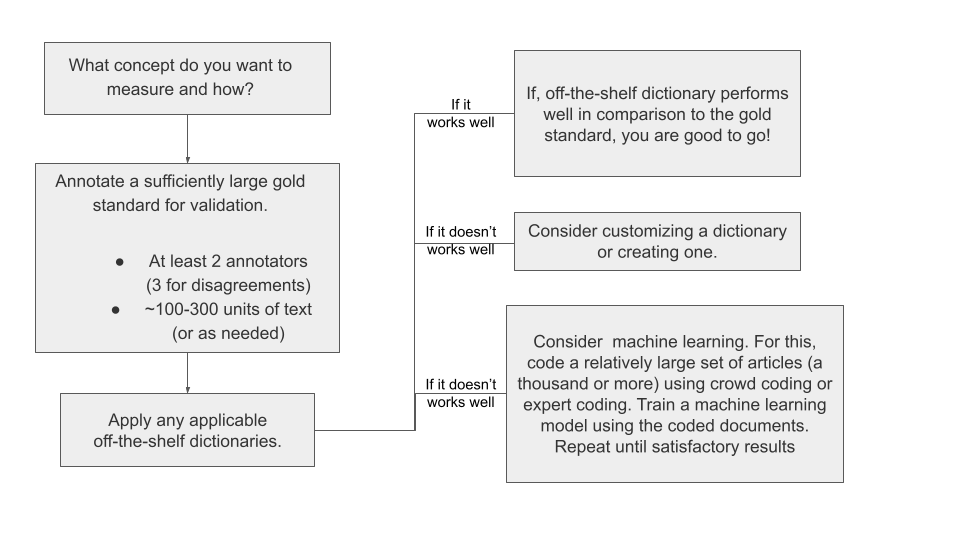

*Illustration based on van Attefeld et al. 2021*


## sentiment analysis with `tidytext`

For basic sentiment analysis, we return to the `tidytext` R Package.

The sentiment dictionaries are offered:

* `afinn` from [Finn Årup Nielsen](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010),
* `bing` from [Bing Liu and collaborators](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), and
* `nrc` from [Saif Mohammad and Peter Turney](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm).

All three of these lexicons are based on unigrams, i.e., single words. These lexicons contain many English words and the words are assigned scores for positive/negative sentiment, and also emotions like joy, anger, sadness, and so forth. 

The `nrc` lexicon categorizes words in a binary fashion ("yes"/"no") into categories of positive, negative, anger, anticipation, disgust, fear, joy, sadness, surprise, and trust. 

The `bing` lexicon categorizes words in a binary fashion into positive and negative categories.

The `afinn` lexicon assigns words with a score that runs between -5 and 5, with negative scores indicating negative sentiment and positive scores indicating positive sentiment. 


We are going to use the `bing` dictionary in this use-case (also because Google Colab doesn't allow us to download the others :/)

In [ ]:
## make sure the tidytext package is loaded
# library(tidytext)

get_sentiments("bing") %>%
  sample_n(10)

word,sentiment
<chr>,<chr>
doubtfully,negative
perplexity,negative
unwelcome,negative
excallent,positive
merry,positive
inexplainable,negative
marginally,negative
privilege,positive
unavoidably,negative


We contact the sentiment analysis by joining the sentiment tags into the words used by Trump. `inner_join()` in this case only keeps words that do have a sentiment attached.

In [ ]:
trump_tweet %>%
  unnest_tokens(word, text) %>%
  inner_join(get_sentiments("bing"))

Joining, by = "word"


id,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,date_year,word,sentiment
<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dttm>,<lgl>,<dbl>,<chr>,<chr>
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,trump,positive
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,blow,negative
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,ridiculous,negative
1.165918e+18,FALSE,FALSE,Twitter for iPhone,90553,21240,2019-08-26 09:25:59,FALSE,2019,fake,negative


Looks like "trump" is a word that has a positive label. Uh oh, that is going to be a problem since Trump talks a lot about himself. Ideally, we would have to remove this word (or rename it) as to not trick our sentiment analysis.

But this is one of the typical issues in unigram based sentiment analysis. So we will keep it for now with this caveat in mind.

Let's conduct the sentiment analysis on the entirety of our dataset:

In [ ]:
trump_tweets_bing <- trump_tweets %>%
  unnest_tokens(word, text) %>%
  inner_join(get_sentiments("bing"))

Joining, by = "word"


#### Sentiment over time

Let's take a look at the number of matched words by year and sentiment:

In [ ]:
trump_tweets_bing %>%
  count(date_year, sentiment, sort = T)

This is of course highly dependent on the number of tweets each year. To get a good understanding of how often positive vs. negative words are used we can calculate the relative frequency, i.e. the percentage of negative and positive words per year.

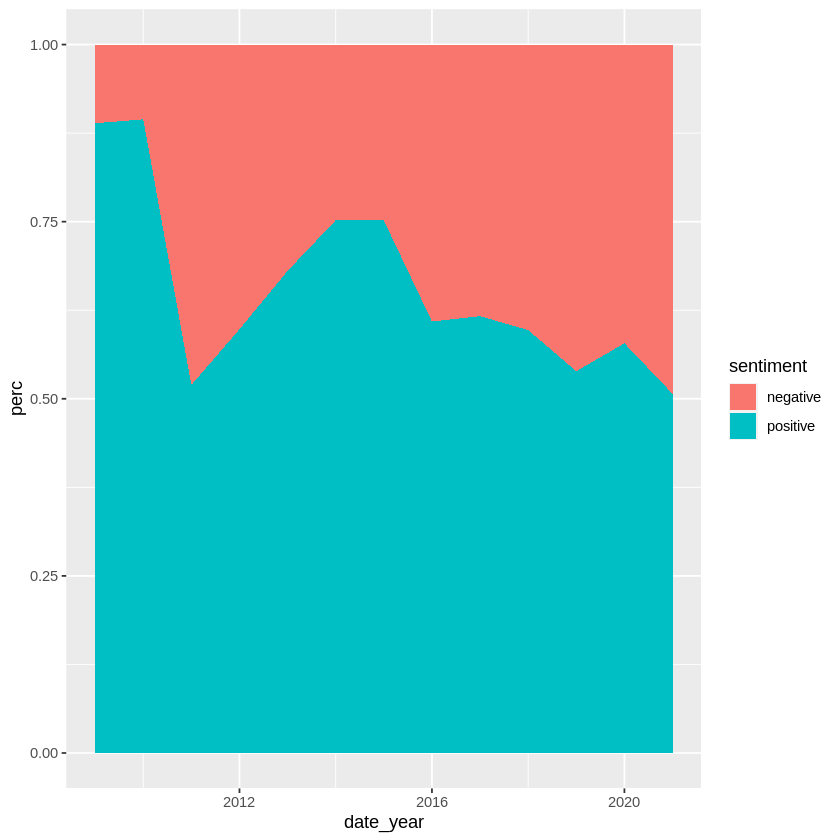

In [ ]:
trump_tweets_bing %>%
  count(date_year, sentiment, sort = T) %>%
  group_by(date_year) %>%
  mutate(perc = n/sum(n)) %>%
  ggplot(aes(date_year, perc, fill = sentiment)) +
  geom_area()

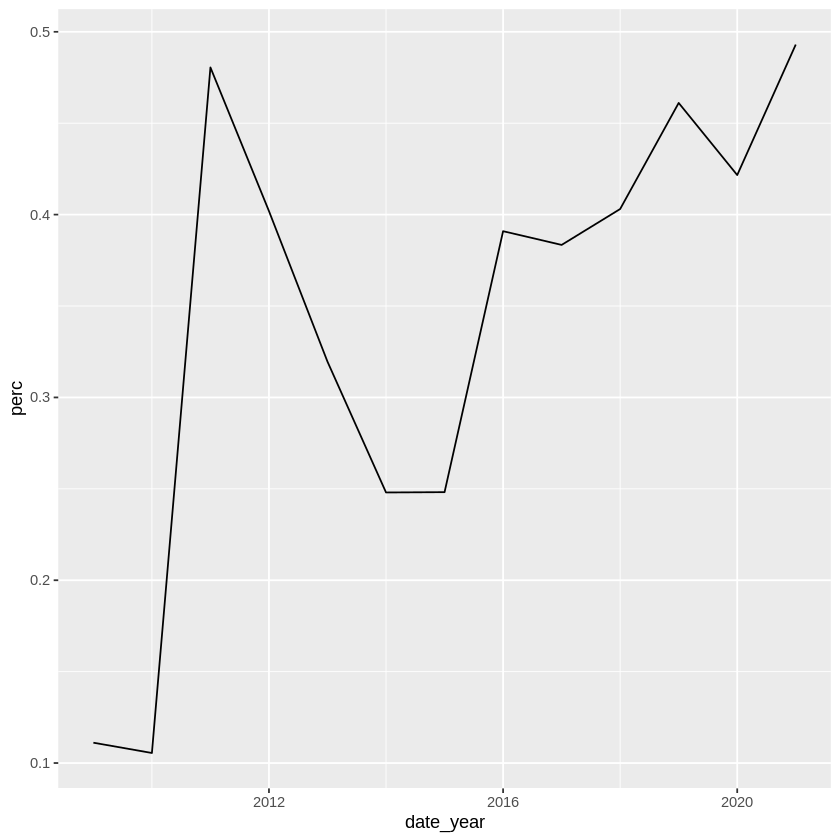

In [ ]:
trump_tweets_bing %>%
  count(date_year, sentiment, sort = T) %>%
  group_by(date_year) %>%
  mutate(perc = n/sum(n)) %>%
  filter(sentiment == "negative") %>%
  ggplot(aes(date_year, perc, fill = sentiment)) +
  geom_line()

Looks like since his presidency started (2016), Trump became more negative!

## Augmented dictionary methods (`sentimentr`)


Augmented dictionary methods are used to improve the performance of natural unigram (i.e. one word) dictionaries. These methods are used to add context to words, and modify the strength and directionality of information.

<p style="font-size:1px"></p> | <p style="font-size:1px"></p>
-------------------|------------------
 <img src="https://github.com/trinker/sentimentr/raw/master/tools/sentimentr_logo/r_sentimentr.png" width = "150"> | <p style="font-size:10px">"`sentimentr` is an augmented dictionary that takes into account valence shifters<br>and (de-)amplifiers designed to quickly calculate text polarity sentiment in the English<br>language at the sentence level."</p>

In [ ]:
if(!require("sentimentr")){
    install.packages("sentimentr")
}

library(sentimentr)

So what does [sentimentr](https://github.com/trinker/sentimentr) do that other packages don't and why does it matter?

sentimentr attempts to take into account 

+ **valence shifters** (i.e., negators)
  + A negator flips the sign of a polarized word 
    + "I do *not* like it."
+ **amplifiers** (intensifiers)
  + "I *really* like it."
+ **de-amplifiers** (downtoners)
  + "I *hardly* like it."
+ **adversative conjunctions** (conjunction that overrides initial meaning)
  + "I like it but it's *not* worth it."
 


Let's calculate the average sentiment of our "nuclear" Trump tweet.

In [ ]:
library(magrittr)

trump_tweet %>%
    get_sentences() %$%
    sentiment_by(text, id)


,id,word_count,sd,ave_sentiment
,<dbl>,<int>,<dbl>,<dbl>
1,1.165918e+18,30,0.3376007,-0.362493


As one would expect, it is classified as negative. Good.

Let's calculate the sentiment for all Trump tweets:

In [ ]:
trump_tweets_sentimentr <- trump_tweets %>%
    get_sentences() %$%
    sentiment_by(text, id) %>% 
    left_join(trump_tweets) 

Joining, by = "id"


In [ ]:
trump_tweets_sentimentr %>%
  arrange(ave_sentiment) %>%
  head(5)

id,word_count,sd,ave_sentiment,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,date_year
<dbl>,<int>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dttm>,<lgl>,<dbl>
1.086464e+18,23,NA,-1.670200,RT @GeraldoRivera: This is just the most egregious example of the rampant unfairness that has tainted this partisan witch-hunt from the beg...,TRUE,FALSE,Twitter for iPhone,0,17157,2019-01-19 03:22:44,FALSE,2019
2.890218e+17,6,NA,-1.607478,"@Samco42 No, but I hate incompetence.",FALSE,FALSE,Twitter Web Client,2,1,2013-01-09 14:52:33,FALSE,2013
1.210417e+18,30,NA,-1.535905,"“Democrats repeatedly claimed impeachment was an urgent matter, but now Nancy Pelosi uses stall tactics to obstruct the Senate.” @replouiegohmert @HeyTammyBruce @FoxNews It’s all part of the Impeachment Hoax!",FALSE,FALSE,Twitter for iPhone,79362,18509,2019-12-27 04:27:44,FALSE,2019
2.607008e+17,25,NA,-1.510350,The debate was pretty even but I thought Mitt should have been much more aggressive on Obama's failed foreign policy-- and I mean much more.,FALSE,FALSE,Twitter Web Client,122,260,2012-10-23 11:14:46,FALSE,2012
7.597347e+17,24,NA,-1.418663,"""Captain Khan, killed 12 years ago, was a hero, but this is about RADICAL ISLAMIC TERROR and the weakness of our """"leaders"""" to eradicate it!""",FALSE,FALSE,Twitter for Android,36167,12241,2016-07-31 12:57:21,FALSE,2016


#### Sentiment over time

Let's take a look at how sentiment changes over time.

`geom_smooth()` using formula 'y ~ x'



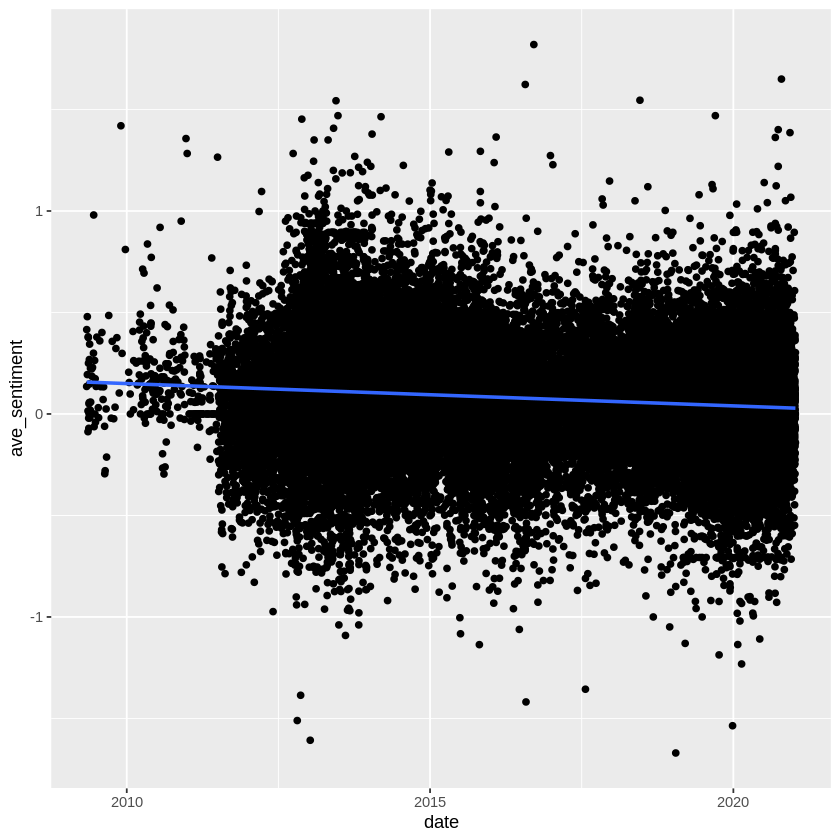

In [ ]:
trump_tweets_sentimentr %>%
  ggplot(aes(date, ave_sentiment)) +
  geom_jitter() +
  geom_smooth(method = "lm")

Looks like sentiment overall seems to decrease. But overall there is a lot of noise between positive and negative tweets by Trump.


### Sentiment by keywords

Let's check how the sentiments differ by different kinds of keywords:

> Republicans, Democrats, Islam/Muslims and Christians

In [ ]:
mentions_dat <- trump_tweets_sentimentr %>%
  mutate(lower_text = str_to_lower(text)) %>%
  mutate(mentions_republican = str_detect(lower_text, ".epublican|gop"),
         mentions_democrat = str_detect(lower_text, ".emocrat"),
         mentions_islam = str_detect(lower_text, "islam|muslim"),
         mentions_christian = str_detect(lower_text, "christian")) 


mentions_dat

In [ ]:
mentions_dat %>%
  group_by(mentions_republican, mentions_democrat, 
           mentions_islam, mentions_christian) %>%
  summarize(ave_sentiment = mean(ave_sentiment)) %>%
  ungroup()

`summarise()` has grouped output by 'mentions_republican', 'mentions_democrat',
'mentions_islam'. You can override using the `.groups` argument.


mentions_republican,mentions_democrat,mentions_islam,mentions_christian,ave_sentiment
<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
FALSE,FALSE,FALSE,FALSE,0.080812842
FALSE,FALSE,FALSE,TRUE,0.058201095
FALSE,FALSE,TRUE,FALSE,-0.027464256
FALSE,FALSE,TRUE,TRUE,-0.168514945
FALSE,TRUE,FALSE,FALSE,-0.070230614
FALSE,TRUE,FALSE,TRUE,-0.123527210
TRUE,FALSE,FALSE,FALSE,0.067984333
TRUE,TRUE,FALSE,FALSE,0.008068997
TRUE,TRUE,FALSE,TRUE,0.164530619


We can see that the sentiment is positive when mentioning Christians, or Republicans. We see a negative sentiment when mentioning Democrats or Islam/Muslims. No suprises here!

# Exercises

For the final exercise todady we are using the `debates` dataset. It includes transcripts of US presidential and primary debates until back to 1960s!

<p style="font-size:1px"></p> | <p style="font-size:1px"></p>
-------------------|------------------
 <img src="https://github.com/jamesmartherus/debates/raw/master/man/figures/logo.png" width = "150"> | <p style="font-size:10px">"`debates` provides easy access to debate transcripts from<br>Presidential, Vice Presidential, and primary candidate debates.<br>The current version includes Presidential and Vice-Presidential<br>debate transcripts starting in 1960, and for most debates from<br>the 2012, 2016, and 2020 primary elections."</p>


1.   Pick a timeperiod, speaker and debates you are interested in
  + depending on your skill level you may choose many different elections or just a single speaker in a single debate
2.   Extract tokens from the data and look at the most common words. What do you see?
  + Choose between removing stopwords, and or calculating tf-idf scores to improve results!
3.   Use part-of-speech tagging to extract keywords
  + Either count nouns, use RAKE, (simple) noun phrases OR dependency parsing
4.   Run a sentiment analysis
  + Check out the most positive, negative speakers and/or texts



In [ ]:
# library(devtools)
# install_github("jamesmartherus/debates")
# library(debates)
# debate_transcripts

We could install the package. For easier access, you can load the dataset directly from the workshop repository like this:


In [ ]:
debate_transcripts <- readr::read_csv("https://raw.githubusercontent.com/favstats/WarwickSpringCamp_QTA/main/docs/slides/day1/data/debate_transcripts.csv")

In [ ]:
debate_transcripts %>%
  head(5)

# Resources for more learning

Many of these sources I used for inspiration for this workshop

**General resources for text-as-data**

* Michael Clark [Text Analysis in R](https://m-clark.github.io/text-analysis-with-R/intro.html)
* Julia Silge and David Robinson [Text Mining with R](https://www.tidytextmining.com/)
* Various Authors [SICCS Learning Materials](https://sicss.io/curriculum)
* Dr. Will Lowe [Text as Data: Quantitative Text Analysis with R](https://socialdatascience.network/courses/textasdata.html)
* Kasper Welbers [Text analysis in R](https://www.youtube.com/watch?v=O6CGXnxPHok&list=PL-i7GM-A1wBZYRYTpem7hNVHK3hSV_1It)
* Andreas Niekler, Gregor Wiedemann
 [Text mining in R for the social sciences and digital humanities
](https://tm4ss.github.io/docs/index.html)

**Supervised machine learning**

* Emil Hvitfeldt and Julisa Silge [Supervised Machine Learning for Text Analysis in R](https://smltar.com/)

**Topic Models**

* Julia Silge [Training, evaluating, and interpreting topic models](https://juliasilge.com/blog/evaluating-stm/)
* Martin Schweinberger
 [Topic Modeling with R](https://ladal.edu.au/topicmodels.html)

https://www.kaggle.com/datasets/headsortails/us-election-2020-presidential-debates